# Neural Network AI (Beginner)
Source: https://realpython.com/python-ai-neural-network/#neural-networks-main-concepts

In [ ]:
#Import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# A.General Information
- This Neural Network model will have 2 layers.
    + 1st layer: Calculate dot product of input vector and weight vectors and return the sum.
    + 2nd layer: Pass the result through Sigmoid's activation function.
    + 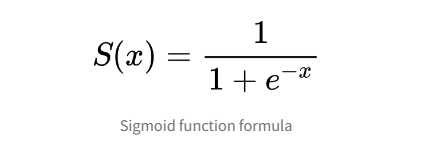
- Dataset results will follow Bernouli probability distribution (ie. TRUE or FALSE). If result >= 0.5, return TRUE otherwise FALSE.

Let's create a simple dataset to interact with.

Input vector      =>          Target

[1.66,1.46]       =>          1

[2,1.5]           =>          0

In [ ]:
#Example vectors
input_vector = np.array([1.66, 1.46])
weights_1 = np.array([1.45, -0.66])
bias = np.array([0.0])

#Sigmoid's activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#Predict function
def make_prediction(input_vector, weights, bias):
    layer_1 = np.dot(input_vector, weights) + bias
    layer_2 = sigmoid(layer_1)
    return layer_2


Let's test our prediction function.

In [ ]:
prediction = make_prediction(input_vector, weights_1, bias)

print(f"The prediction result is {prediction}")

We can see that the prediction is greater than 0.5, so the result is 1, which is correct.
Let's try it with our second input vector.

In [ ]:
input_vector = np.array([2,1.5])
prediction = make_prediction(input_vector, weights_1, bias)

print(f"The prediction result is {prediction}")

The prediction is 1, which is wrong. So how do we calculate how wrong the prediction is?

# B.Error threshold calculation
To calculate the error of the prediction, we use a cost function (loss function).
In this notebook, we will use mean squared error (MSE) as the cost function.

In [ ]:
target = 0

mse = np.square(prediction - target)
print(f"Prediction: {prediction}; Error: {mse}")

So, why do we use the square product? Because as the error gets larger, the impact is bigger. Whilst as it decreases, the impact gets exponentially smaller.

The error function here is actually a **quadratic function**, which resembles this

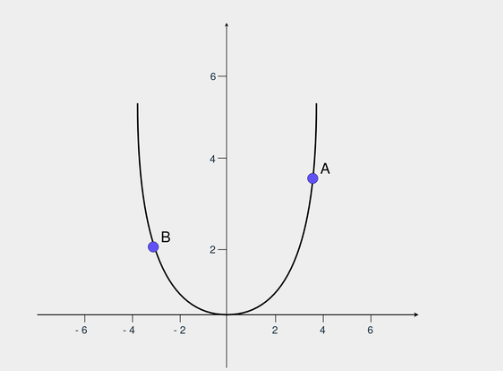

The y-axis is the error. So to determine how to reduce the error (increase or decrease x value), we calculate the **derivative**.

In [ ]:
derivative = 2 * (prediction - target)

print(f"The derivative is {derivative}")

The result is positive, so we need to decrease the weights. But we should only decrease the weight by **a fraction** of the derivative. Because otherwise the weights vector will be too high/low, which causes overfitting. This fraction value is called **the learning rate**, or **alpha**.

*Note*: Traditional alpha values are 0.1, 0.01 or 0.001.

# C. Adjusting weight and bias vectors
For each variable, we need to calculate the error derivative for that variable. We can do this through the **chain rule**.

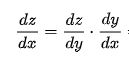

In [ ]:
#Derivative of prediction with respect to layer 1 (Sigmoid)
def deriv_sigmoid(x):
    return sigmoid(x) * (1-sigmoid(x))
derror_dprediction = 2 * (prediction - target)

layer_1 = np.dot(input_vector, weights_1) + bias
dprediction_dlayer1 = deriv_sigmoid(layer_1)

dlayer1_dweights = (0 * weights_1) + (1 * input_vector) #Derivative of layer_1 with respect to weights_1

dlayer1_dbias = 1 #Derivative of layer_1 with respect to bias

derror_dweights = (derror_dprediction * dprediction_dlayer1 * dlayer1_dweights)
derror_dbias = (derror_dprediction * dprediction_dlayer1 * dlayer1_dbias)

Creating MyModel class.

In [ ]:
class MyModel:
    def __init__(self, learning_rate) -> None:
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def _derivative_sigmoid(self, x):
        return self._sigmoid(x) * (1-self._sigmoid(x))
    
    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = sigmoid(layer_1)
        return layer_2
    
    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._derivative_sigmoid(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )
        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )
        return derror_dbias, derror_dweights
    
    def train(self, input_vectors, targets, epochs=5):
        """
        Train the model

        input_vectors: array of input vectors
        targets: array of target values that corresponds to input vectors
        epochs: number of iterations (default is 5)
        """
        cumulative_errors = []
        for current_iteration in range(epochs):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

# C.Training the model

In [ ]:
input_vectors = np.array([[3, 1.5], [2, 1],[4, 1.5],[3, 4],[3.5, 0.5],[2, 0.5],[5.5, 1],[1, 1]]) 

targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])

alpha = 0.1

model = MyModel(alpha)

training_errors = model.train(input_vectors, targets, epochs=10000)

training_errors


In [ ]:
plt.plot(training_errors)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.savefig("errors.png")

Now let's try to predict something.

In [ ]:
model.predict(np.array([2.5,-0.6]))